In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ag-news-classification-dataset/train.csv
/kaggle/input/ag-news-classification-dataset/test.csv


In [2]:
!pip install -q pytorch-lightning;
!pip install -q transformers;

In [3]:
'''
Things to do:
0. Get the other notebook cells here completely as is as the code works in that notebook.
1. Attempt with class imbalance.
2. The intermediate results needs to be saved.
3. Filter and create a final report on only the statistically insignificant and one for statistically significant.
(Accuracy, f1-score, precision, recall etc)
'''

'\nThings to do:\n1. Attempt with class imbalance.\n2. The intermediate results needs to be saved.\n3. Filter and create a final report on only the statistically insignificant and one for statistically significant.\n(Accuracy, f1-score, precision, recall etc)\n'

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import stats

In [6]:
"""
Create the hypothesis also programable

H0: The obtained precision, recall, accuracy or f1 score is at random
H1: There is some significance to the obtained values and is not at random occurance
"""

'\nCreate the hypothesis also programable\n\nH0: The obtained precision, recall, accuracy or f1 score is at random\nH1: There is some significance to the obtained values and is not at random occurance\n'

In [4]:
df_train = pd.read_csv("/kaggle/input/ag-news-classification-dataset/train.csv")
df_test = pd.read_csv("/kaggle/input/ag-news-classification-dataset/test.csv")

In [11]:
def z_test(distribution, value):
    # Calculate the mean and standard deviation of the distribution
    '''
    # Example usage
    distribution = [10, 12, 13, 14, 15, 16, 18, 19, 20, 22, 24, 25]
    value = 30
    z_test(distribution, value)
    '''
    mean = np.mean(distribution)
    std_dev = np.std(distribution, ddof=1)  # Sample standard deviation

    # Calculate the Z-score
    z_score = (value - mean) / std_dev

    # Calculate the p-value
    p_value = stats.norm.sf(abs(z_score)) * 2  # two-tailed test

    # Print the results
    print(f"Mean of distribution: {mean}")
    print(f"Standard Deviation of distribution: {std_dev}")
    print(f"Z-score: {z_score}")
    print(f"P-value: {p_value}")

    # Determine if the result is significant (alpha level of 0.05)
    alpha = 0.05
    significant = False
    if p_value < alpha:
        significant = True
        print(f"The value {value} is significant at the alpha level of {alpha}.")
    else:
        significant = False
        print(f"The value {value} is not significant at the alpha level of {alpha}.")
        
    return mean, std_dev, z_score, p_value, significant


def t_test(distribution, value):
    # Calculate the mean and standard deviation of the distribution
    '''
    # Example usage
    distribution = [10, 12, 13, 14, 15, 16, 18, 19, 20, 22, 24, 25]
    value = 30
    t_test(distribution, value)
    '''
    mean = np.mean(distribution)
    std_dev = np.std(distribution, ddof=1)  # Sample standard deviation
    n = len(distribution)
    
    # Calculate the t-score
    t_score = (value - mean) / (std_dev / np.sqrt(n))

    # Calculate the p-value
    p_value = stats.t.sf(np.abs(t_score), df=n-1) * 2  # two-tailed test

    # Print the results
    print(f"Mean of distribution: {mean}")
    print(f"Standard Deviation of distribution: {std_dev}")
    print(f"T-score: {t_score}")
    print(f"P-value: {p_value}")

    # Determine if the result is significant (alpha level of 0.05)
    alpha = 0.05
    if p_value < alpha:
        print(f"The value {value} is significant at the alpha level of {alpha}.")
    else:
        print(f"The value {value} is not significant at the alpha level of {alpha}.")




In [7]:
# Function to calculate class probabilities from ground truth
def calculate_class_probabilities(ground_truth, c):
    counts = np.bincount(ground_truth, minlength=c)
    probabilities = counts / len(ground_truth)
    return probabilities

# Function to generate ground truth
def generate_ground_truth(n, c):
    return np.random.choice(range(1,c+1), n, p=[1/c]*c)

# Function to perform random predictions
def random_predictions(ground_truth, c, class_probabilities):
    #------random-------
    #random_choices = np.random.choices(range(c), len(ground_truth),p=class_probabilities)
    #------actual--------
    random_choices = random.choices(range(1,c+1), k=len(ground_truth),weights=class_probabilities)
    return random_choices


# Function to create classification reports
def create_classification_reports(ground_truth, predictions):
    reports = []
    for pred in tqdm(predictions):
        report = classification_report(ground_truth, pred, output_dict=True)
        reports.append(report)
    return reports

In [8]:
n = len(df_train['Class Index'])
print(f'n : {n}')

c = len(df_train['Class Index'].unique())
print(f'n : {c}')

s=1000

#------------Obtained score from model--------

n : 120000
n : 4


In [ ]:
# # Parameters
# n = 386000  # Length of ground truth list
# c = 550     # Number of classes
# # n = 100  # Length of ground truth list
# # c = 5     # Number of classes
# s = 100    # Number of simulations

----Prepared Ground Truth----
----Obtained class probabilities----
----Created validation dataset----
----Performing Simulations----


100%|██████████| 1000/1000 [00:02<00:00, 494.02it/s]


----Created Simulations----
----Creating Classification Reports----


100%|██████████| 1000/1000 [00:21<00:00, 45.80it/s]


----Comparing distribution of accuracies from all Classification Reports----
----z_test result-----
Mean of distribution: 0.2502434210526316
Standard Deviation of distribution: 0.005136551992201057
Z-score: 15.527260128674769
P-value: 2.2686781421029206e-54
The value 0.33 is significant at the alpha level of 0.05.
None
----t_test result-----


NameError: name 'f1_score' is not defined

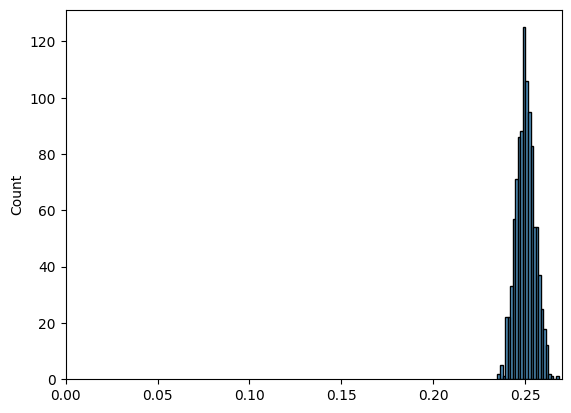

In [9]:
# -------------Generate ground truth------------
#---------random--------
# ground_truth = generate_ground_truth(n, c)
#------------actual-------
ground_truth = list(df_train['Class Index'])
print("----Prepared Ground Truth----")


# ---------Calculate class probabilities from the ground truth
#-----------random--------
# class_probabilities = calculate_class_probabilities(ground_truth, c)
#------------actual-------------
sorted_df = pd.DataFrame(df_train['Class Index'].value_counts()).reset_index().sort_values(by='Class Index')
class_probabilities = [x/sum(list(sorted_df['count'])) for x in list(sorted_df['count'])]
print("----Obtained class probabilities----")



# -----------Split into training and validation sets (90%-10%)
#--------random-------
# split_index = int(0.9 * n)
# train_gt = ground_truth[:split_index]
# val_gt = ground_truth[split_index:]
#------actual------------
train_gt = ground_truth
val_gt = list(df_test['Class Index'])

print("----Created validation dataset----")
print("----Performing Simulations----")




# Perform random predictions multiple times
predictions = []
for _ in tqdm(range(s)):
    predictions.append(random_predictions(val_gt, c, class_probabilities))
print("----Created Simulations----")
# print(predictions)
# Create classification reports
print("----Creating Classification Reports----")
reports = create_classification_reports(val_gt, predictions)
# print(reports)
# Extract accuracy scores from the reports
print("----Comparing distribution of accuracies from all Classification Reports----")
accuracies = [report['accuracy'] for report in reports]

# Visualization of the density plot
sns.histplot(accuracies).set(xlim=(0))
print("----z_test result-----")
print(z_test(accuracies,0.33))
print("----t_test result-----")
print(t_test(f1_score,0.33))
plt.title('Density Plot of Accuracy Scores from Random Predictions')
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.show()

# Extract accuracy scores from the reports
accuracies = [report['accuracy'] for report in reports]
temporary_accuracy = reports[0]['accuracy']
# Visualization of the density plot
print("----z_test result-----")
print(z_test(f1_score,temporary_accuracy))
print("----t_test result-----")
print(t_test(f1_score,temporary_accuracy))





----Comparing distribution of f1-score for class 2 from all Classification Reports----
----z_test result-----
Mean of distribution: 0.2501083312496771
Standard Deviation of distribution: 0.009271373545492042
Z-score: -1.7199546969364887
P-value: 0.08544067682066644
The value 0.23416198877305533 is not significant at the alpha level of 0.05.
----t_test result-----
Mean of distribution: 0.2501083312496771
Standard Deviation of distribution: 0.009271373545492042
T-score: -54.38974314623934
P-value: 7.0846117395803344e-301
The value 0.23416198877305533 is significant at the alpha level of 0.05.
None


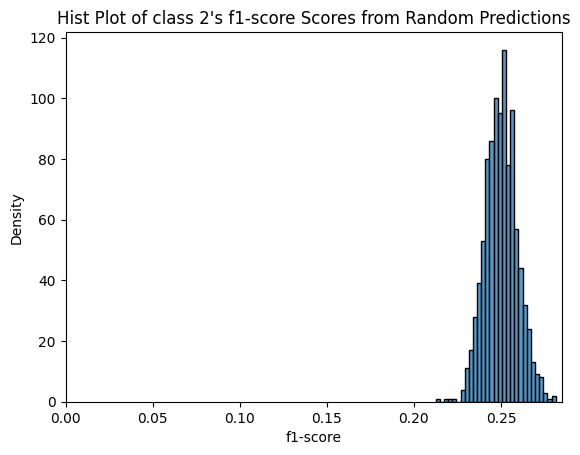

----Comparing distribution of precision for class 2 from all Classification Reports----
----z_test result-----
Mean of distribution: 0.25016928287509166
Standard Deviation of distribution: 0.00889026147051082
Z-score: -1.3784865426137263
P-value: 0.1680531199591404
The value 0.23791417707767518 is not significant at the alpha level of 0.05.
----t_test result-----
Mean of distribution: 0.25016928287509166
Standard Deviation of distribution: 0.00889026147051082
T-score: -43.59157198550133
P-value: 2.3264303708572236e-233
The value 0.23791417707767518 is significant at the alpha level of 0.05.
None


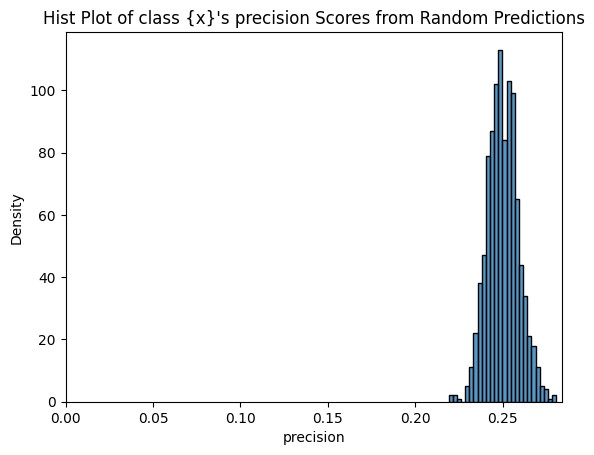

----Comparing distribution of f1-score for class 3 from all Classification Reports----
----z_test result-----
Mean of distribution: 0.2502328248653451
Standard Deviation of distribution: 0.009126102308589781
Z-score: -0.7371365204967372
P-value: 0.4610393321006484
The value 0.24350564156389398 is not significant at the alpha level of 0.05.
----t_test result-----
Mean of distribution: 0.2502328248653451
Standard Deviation of distribution: 0.009126102308589781
T-score: -23.310303512610826
P-value: 2.573574931945004e-96
The value 0.24350564156389398 is significant at the alpha level of 0.05.
None


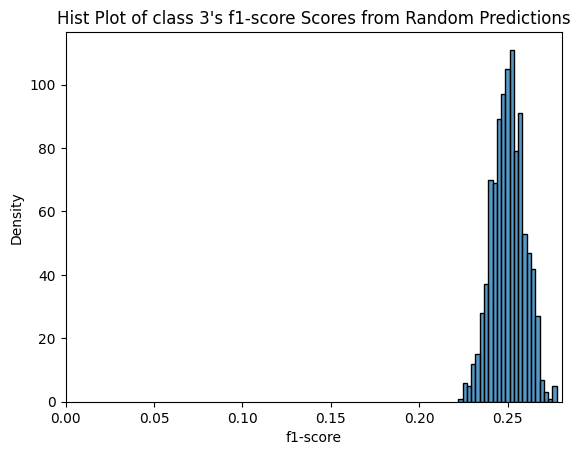

----Comparing distribution of precision for class 3 from all Classification Reports----
----z_test result-----
Mean of distribution: 0.2501210333435959
Standard Deviation of distribution: 0.008689891599605088
Z-score: -0.8419229430367987
P-value: 0.39983108712725013
The value 0.24280481423338565 is not significant at the alpha level of 0.05.
----t_test result-----
Mean of distribution: 0.2501210333435959
Standard Deviation of distribution: 0.008689891599605088
T-score: -26.623941143484835
P-value: 1.8565882462850805e-118
The value 0.24280481423338565 is significant at the alpha level of 0.05.
None


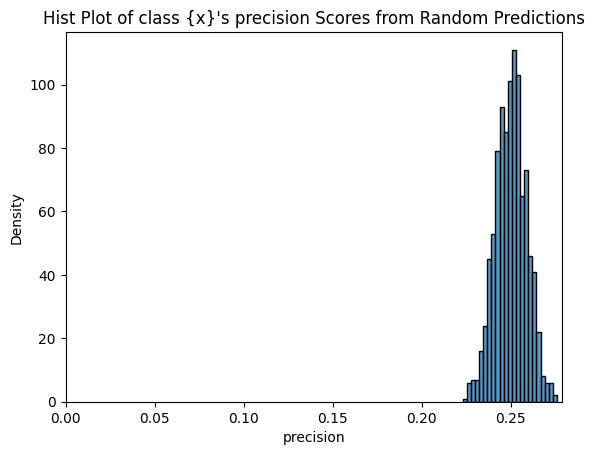

----Comparing distribution of f1-score for class 4 from all Classification Reports----
----z_test result-----
Mean of distribution: 0.2501900699170866
Standard Deviation of distribution: 0.009231729723859388
Z-score: 0.37351437101275176
P-value: 0.7087656514877428
The value 0.25363825363825365 is not significant at the alpha level of 0.05.
----t_test result-----
Mean of distribution: 0.2501900699170866
Standard Deviation of distribution: 0.009231729723859388
T-score: 11.811561512054686
P-value: 3.14046071396783e-30
The value 0.25363825363825365 is significant at the alpha level of 0.05.
None


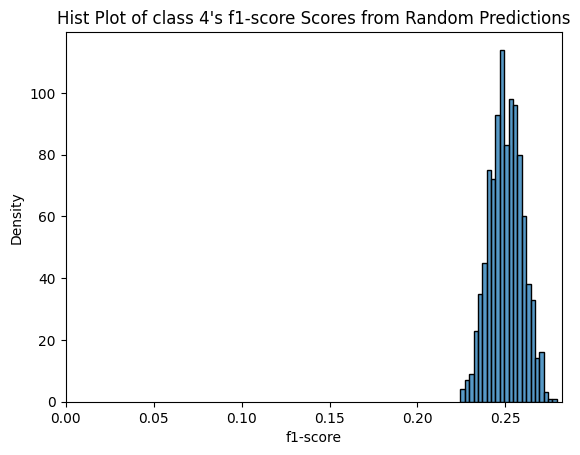

----Comparing distribution of precision for class 4 from all Classification Reports----
----z_test result-----
Mean of distribution: 0.25030979893729505
Standard Deviation of distribution: 0.00898431041849416
Z-score: 0.022655949740250828
P-value: 0.9819247138219637
The value 0.25051334702258726 is not significant at the alpha level of 0.05.
----t_test result-----
Mean of distribution: 0.25030979893729505
Standard Deviation of distribution: 0.00898431041849416
T-score: 0.7164440373349279
P-value: 0.4738846576555985
The value 0.25051334702258726 is not significant at the alpha level of 0.05.
None


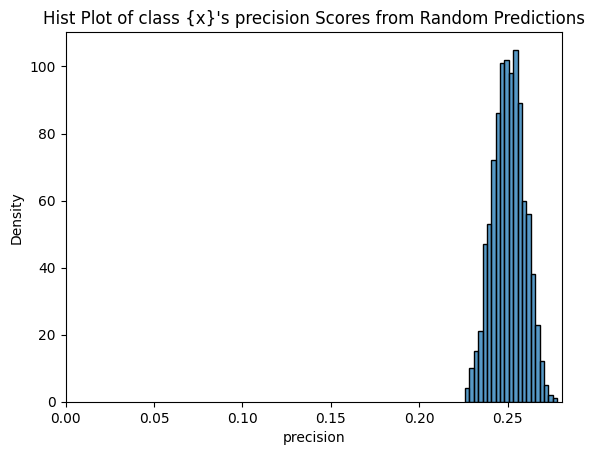

In [14]:
df_list = []
for x in range(2,5):
    print(f"----Comparing distribution of f1-score for class {x} from all Classification Reports----")
    f1_score = [report[str(x)]['f1-score'] for report in reports]
    
    # needs to be changed later to actual model performance metrics
    temporary_f1_score = reports[0][str(x)]['f1-score']
    
    # Visualization of the density plot
    print("----z_test result-----")
    f1s_mean, f1s_std_dev, f1s_z_score, f1s_p_value, f1s_significant = z_test(f1_score,temporary_f1_score)
    print("----t_test result-----")
    print(t_test(f1_score,temporary_f1_score))
    sns.histplot(f1_score).set(xlim=(0))
    plt.title(f'Hist Plot of class {x}\'s f1-score Scores from Random Predictions')
    plt.xlabel('f1-score')
    plt.ylabel('Density')
    plt.show()

    # Extract accuracy scores from the reports
    print(f"----Comparing distribution of precision for class {x} from all Classification Reports----")
    precision = [report[str(x)]['precision'] for report in reports]
    
    # needs to be changed later to actual model performance metrics
    temporary_precision = reports[0][str(x)]['precision']

    # Visualization of the density plot
    print("----z_test result-----")
    precision_mean, precision_std_dev, precision_z_score, precision_p_value, precision_significant = z_test(precision,temporary_precision)
    print("----t_test result-----")
    print(t_test(precision,temporary_precision))
    sns.histplot(precision).set(xlim=(0))
    plt.title('Hist Plot of class {x}\'s precision Scores from Random Predictions')
    plt.xlabel('precision')
    plt.ylabel('Density')
    plt.show()
    
    df_list.append({'class':x,
                    'f1_score_mean': f1s_mean, 
                    'f1_score_std_dev' : f1s_std_dev, 
                    'f1_score_z_score' : f1s_z_score,
                    'f1_score_p_value' : f1s_p_value, 
                    'f1_score_significant' : f1s_significant,
                    'precision__mean': precision_mean, 
                    'precision_std_dev' : precision_std_dev, 
                    'precision_z_score' : precision_z_score,
                    'precision_p_value' : precision_p_value, 
                    'precision_significant' : precision_significant,
                   })

In [43]:
reports[4]

{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0},
 '1': {'precision': 0.24270833333333333,
  'recall': 0.24526315789473685,
  'f1-score': 0.24397905759162306,
  'support': 1900},
 '2': {'precision': 0.23811957077158916,
  'recall': 0.24526315789473685,
  'f1-score': 0.24163857920663726,
  'support': 1900},
 '3': {'precision': 0.25312330255296034,
  'recall': 0.24526315789473685,
  'f1-score': 0.2491312483293237,
  'support': 1900},
 '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1900},
 'accuracy': 0.18394736842105264,
 'macro avg': {'precision': 0.14679024133157656,
  'recall': 0.1471578947368421,
  'f1-score': 0.14694977702551681,
  'support': 7600},
 'weighted avg': {'precision': 0.1834878016644707,
  'recall': 0.18394736842105264,
  'f1-score': 0.183687221281896,
  'support': 7600}}

In [15]:
pd.DataFrame(df_list)

,class,f1_score_mean,f1_score_std_dev,f1_score_z_score,f1_score_p_value,f1_score_significant,precision__mean,precision_std_dev,precision_z_score,precision_p_value,precision_significant
0,2,0.250108,0.009271,-1.719955,0.085441,False,0.250169,0.008890,-1.378487,0.168053,False
1,3,0.250233,0.009126,-0.737137,0.461039,False,0.250121,0.008690,-0.841923,0.399831,False
2,4,0.250190,0.009232,0.373514,0.708766,False,0.250310,0.008984,0.022656,0.981925,False


Mean of distribution: 17.333333333333332
Standard Deviation of distribution: 4.8116021397778885
T-score: 9.119336799620983
P-value: 1.8423419071120955e-06
The value 30 is significant at the alpha level of 0.05.
